In [1]:
import numpy as np
import matplotlib.pyplot as pyp
import matplotlib.colors as colors
import os
import corner
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib
%matplotlib inline

In [2]:
pyp.style.use('seaborn-talk')
pyp.rcParams['font.size']=28
cmap = matplotlib.cm.get_cmap('winter')

In [3]:
print os.environ['TAU_ACC_DET_DIR']
print os.environ['TAU_DIR']

/u/project/bern/swissel/nutau/det_files
/u/project/bern/swissel/nutau


In [4]:
def plot_anita_askaryan(color=None, linestyle=None, label=None, livetime=1., linewidth=1):
    # ANITA 3
    #log_en = np.array([18, 18.5, 19, 19.5, 20, 20.5, 21] )
    #acc    = np.array([0.00038, 0.016, 0.31, 2.5, 14, 46, 109])
    
    # ANITA 1-3 arithmetric mean of the acceptances
    acc = np.array([0.000373656,0.0273364,0.563105,4.55475,24.8859,75.5364,184.24])
    log_en = np.array([18., 18.5, 19, 19.5, 20, 20.5, 21])
    
    # ANITA nu tau ratio from icemc
    nutau_ratio = np.array([6.45E-02, 4.41E-02,3.02E-01,3.36E-01,3.11E-01,3.50E-01, 3.62E-01])
    
    if( label == None):
        label = r"ANITA I,II,III $\nu_{\tau}$ Askaryan"
    pyp.loglog(pow(10,log_en), acc*nutau_ratio*livetime*1e10, 
                 color=color, linestyle=linestyle, label=label, linewidth=linewidth)
    
def plot_anita_askaryan_exposure(color=None, linestyle=None, label=None, linewidth=1.0):
    # ANITA 3
    #log_en = np.array([18, 18.5, 19, 19.5, 20, 20.5, 21] )
    #acc    = np.array([0.00038, 0.016, 0.31, 2.5, 14, 46, 109])
    
    # ANITA 1-3 summed exposure, not including analysis efficiencies
    log_en = np.array([18., 18.5, 19, 19.5, 20, 20.5, 21])
    exp = np.array([2097.6,171241,3.42197e+06,2.6872e+07,1.46763e+08,4.44252e+08,1.07933e+09])
    
    # ANITA nu tau ratio from icemc
    nutau_ratio = np.array([6.45E-02, 4.41E-02,3.02E-01,3.36E-01,3.11E-01,3.50E-01, 3.62E-01])
    
    if( label == None):
        label = r"ANITA I,II,III $\nu_{\tau}$ Askaryan"
    pyp.loglog(pow(10,log_en), exp*nutau_ratio*1e10, 
                 color=color, linestyle=linestyle, label=label, linewidth=linewidth)

In [5]:
def plot_auger_acceptance(color=None, linestyle=None, label=None, livetime=1., alpha=1.0, linewidth=1.0):
    df = pd.read_csv(os.environ['TAU_DIR']+"/nutau_acceptance/util/auger_tau_nu_exposure.csv", skiprows=1,names=[ "exposure_cm2_sr_s", "acceptance_cm2_sr", "","", ""])
    if( label == None):
        label = r"Auger $\nu_{\tau}$ ICRC 2017"
    pyp.loglog(df.index, df.acceptance_cm2_sr*livetime,
               linewidth=linewidth, alpha=alpha,color=color, linestyle=linestyle, label=label)
    
    
def plot_auger_acceptance_icrc2017(color=None, linestyle=None, label=None, livetime=1., alpha=1.0, linewidth=1.0):
    df = pd.read_csv(os.environ['TAU_DIR']+"/nutau_acceptance/util/auger_icrc2017_earthskimming_exposure.csv",
                     skiprows=1,usecols=[0,1,10],names=[ "energy", "exposure_cm2_sr_s", "acceptance_km2_sr"])
    if( label == None):
        label = r"Auger Earth-skimming $\nu_{\tau}$ 2017"
    pyp.plot(df.energy, df.acceptance_km2_sr*livetime,
               linewidth=linewidth, alpha=alpha,color=color, linestyle=linestyle, label=label)
    
def plot_auger_exposure_icrc2017(color=None, linestyle=None, label=None, alpha=1.0, linewidth=1.0):
    df = pd.read_csv(os.environ['TAU_DIR']+"/nutau_acceptance/util/auger_icrc2017_earthskimming_exposure.csv",
                     skiprows=1,usecols=[0,1,10],names=[ "energy", "exposure_cm2_sr_s", "acceptance_km2_sr"])
    if( label == None):
        label = r"Auger $\nu_{\tau}$ ICRC 2017"
    pyp.plot(df.energy, df.exposure_cm2_sr_s,
               linewidth=linewidth, alpha=alpha,color=color, linestyle=linestyle, label=label)

In [6]:
def plot_icecube_acceptance(color=None, linestyle=None, label=None, livetime=1., linewidth=1.0, alpha=1.0):
    df = pd.read_csv(os.environ['TAU_DIR']+"/nutau_acceptance/util/icecube_acceptance.csv", 
                 skiprows=2,names=["sum_logenergy", "sum_exp_cm2srs", "sum_acceptance_km2sr",
                                   "nue_logenergy", "nue_exp_cm2srs", "nue_acceptance_km2sr",
                                   "numu_logenergy", "numu_exp_cm2srs", "numu_acceptance_km2sr",
                                   "nutau_logenergy", "nutau_exp_cm2srs", "nutau_acceptance_km2sr", "", ""])
    if( label == None):
        label = r"IceCube $\nu_{\tau}$ PRL 2016"
    pyp.loglog(pow(10,df.nutau_logenergy), df.nutau_acceptance_km2sr*livetime*1e10, color=color, linestyle=linestyle, label=label, linewidth=linewidth, alpha=alpha)

In [7]:
def read_det_acceptance_file(finame, en1, en2):
    fi = np.load(finame)
    A_Omega_start = np.array(fi['A_Omega_start'])
    A_Omega_exit  = np.array(fi['A_Omega_exit'])
    A_Omega_range = np.array(fi['A_Omega_range'])
    A_Omega_trig  = np.array(fi['A_Omega_trig'])
    log_energy = np.log10(en1*pow(10., en2))
    return A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy

In [8]:
def plot_acceptance(altitude, ice_thick, f_Lo, BW, gain, nphased, decay_alt, label="", color=None, linestyle=None, livetime=1.):

    en1_list = [1,3]
    en2_list = np.arange(15, 22, 1)

    A_Omega_start_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_exit_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_range_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_trig_array = np.zeros([len(en1_list)*len(en2_list)-1])

    energy_array = []
    for i_en2, en2 in enumerate(en2_list):       
        for i_en1, en1 in enumerate(en1_list):  
            if( ~(en1==3 and en2==21)):
                energy_array.append(np.log10(en1*pow(10.,en2)))
    #print energy_array

    i_en = 0
    for i_en2, en2 in enumerate(en2_list):       

        for i_en1, en1 in enumerate(en1_list):         
            f_High = f_Lo + BW
            if( f_High > 1660 or (en1==3 and en2==21) ):
                continue
            else:
                #finame = os.environ['TAU_ACC_DET_DIR']+"/detector_acceptance_altitude_%d_km_2.0km_ice_lowCS_stdEL_%de+%d_eV_%d-%dMHz.npz"%(
                #  altitude, en1, en2, f_Lo, f_High)

                finame = os.environ['TAU_ACC_DET_DIR'] + "/anita/decay_" + str(decay_alt) + "km/detector_acceptance_altitude_%d_km_%1.1fkm_ice_midCS_stdEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                    altitude,ice_thick,en1,en2,f_Lo,f_High,gain,nphased)
                #print finame
                #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                A_Omega_start_array[ i_en] = A_Omega_start
                A_Omega_exit_array[i_en] = A_Omega_exit
                A_Omega_range_array[ i_en] = A_Omega_range
                A_Omega_trig_array[ i_en] = A_Omega_trig
                #pyp.semilogy(np.log10(en1*pow(10.,en2)), A_Omega_trig, '.')
                #print np.log10(en1*pow(10,en2))
                if( en1 == 1 and en2 == 21):
                    print finame, A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy, en1, en2, energy_array[i_en]
            i_en += 1
    if label == "":
        label='%d-%d MHz %2.1f dBi'%(f_Lo, f_Lo + BW, gain)
    
    pyp.semilogy( energy_array, A_Omega_trig_array*livetime*1e10, label=label,color=color,linestyle=linestyle)

In [9]:
def find_nearest(array, values, lower_bound=None, upper_bound=None):
    # finds the nearest values in the arrays
    # if the values are outside the desire range, sets the index to -1
    values = np.atleast_1d(values)
    indices = np.abs(np.int64(np.subtract.outer(array, values))).argmin(0)
    out = array[indices]
    if( lower_bound != None):
        bound_ind = np.where(values < lower_bound)
        indices[bound_ind] = -1
    if( upper_bound != None):
        bound_ind = np.where(values > upper_bound)
        indices[bound_ind] = -1
    return indices

In [10]:
def plot_acceptance_multiparm2d(altitude, ice_thick, f_Lo, BW, 
                                gain, nphased, decay_alt, label="", 
                                color=None, linestyle=None,alpha=None, livetime=1.,
                                cross="mid", eloss="std",
                               dirc = "/anita/decay_zenith_parm/", a3phimasking=False, linewidth=2):

    en1_list = [1,3]
    en2_list = np.arange(15, 22, 1)

    anita3_phimask_logen  = np.array([18, 18.5, 19, 19.5, 20, 20.5, 21])
    anita3_phimask_eff =    np.array([0.313058, 0.263607, 0.406598, 0.496359, 0.562547, 0.624839, 0.66609])
    
    A_Omega_start_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_exit_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_range_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_trig_array = np.zeros([len(en1_list)*len(en2_list)-1])

    energy_array = []
    for i_en2, en2 in enumerate(en2_list):       
        for i_en1, en1 in enumerate(en1_list):  
            if( ~(en1==3 and en2==21)):
                energy_array.append(en1*pow(10.,en2))
    #print energy_array

    i_en = 0
    for i_en2, en2 in enumerate(en2_list):       

        for i_en1, en1 in enumerate(en1_list):         
            f_High = f_Lo + BW
            if( f_High > 1660 or (en1==3 and en2==21) ):
                continue
            else:
                #finame = os.environ['TAU_ACC_DET_DIR']+"/detector_acceptance_altitude_%d_km_2.0km_ice_lowCS_stdEL_%de+%d_eV_%d-%dMHz.npz"%(
                #  altitude, en1, en2, f_Lo, f_High)

                finame = os.environ['TAU_ACC_DET_DIR'] + dirc +"/detector_acceptance_altitude_%d_km_%1.1fkm_ice_midCS_stdEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                    altitude,ice_thick,en1,en2,f_Lo,f_High,gain,nphased)
                #print finame
                #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                A_Omega_start_array[ i_en] = A_Omega_start
                A_Omega_exit_array[i_en] = A_Omega_exit
                A_Omega_range_array[ i_en] = A_Omega_range
                
                if( a3phimasking):
                    # NOTE FOR Energies < 10^18 using the 10^18 phimask efficiency
                    # FOR Energies >10^21 use the highest value
                    ind = find_nearest(anita3_phimask_logen, np.log10(en1*pow(10., en2)))
                    phimask_eff = anita3_phimask_eff[ind]
                else:
                    phimask_eff = 1.0
                    
                A_Omega_trig_array[ i_en] = A_Omega_trig * phimask_eff    
                #pyp.semilogy(np.log10(en1*pow(10.,en2)), A_Omega_trig, '.')
                #print np.log10(en1*pow(10,en2))
                #if( en1 == 1 and en2 == 21):
                    #print finame, A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy, en1, en2, energy_array[i_en]
            i_en += 1
    if label == "":
        label='%d-%d MHz %2.1f dBi'%(f_Lo, f_Lo + BW, gain)
    
    
    pyp.loglog( energy_array, A_Omega_trig_array*livetime*1e10, label=label,color=color,linestyle=linestyle,alpha=alpha, linewidth=linewidth)
    return energy_array, A_Omega_trig_array*livetime*1e10

In [11]:
ANITA1_LT = 17.4*24*3600
ANITA3_LT = 17.4*24*3600
AUGER_LT = 8.5 * 365* 24 * 3600
ICECUBE_LT = 2426 * 24 * 3600

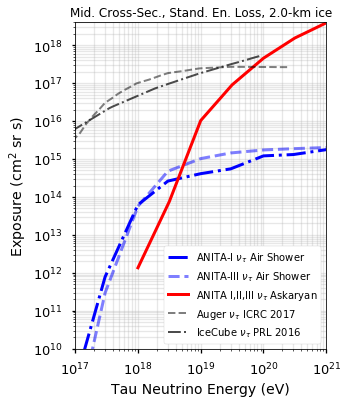

In [12]:
altitude = 37
ice_thick = 2

pyp.figure(figsize=(4.5,6))
en1, exp1 = plot_acceptance_multiparm2d(altitude, ice_thick, 180, 1020, 10, 1, 5, label=r"ANITA-I $\nu_{\tau}$ Air Shower", color='blue', linestyle='-.',
                           dirc = "/anita/anita-3/", livetime=ANITA3_LT, a3phimasking=True, linewidth=3)
en3, exp3 = plot_acceptance_multiparm2d(altitude, ice_thick, 180, 1020, 10, 1, 5, label=r"ANITA-III $\nu_{\tau}$ Air Shower", color='b', linestyle='--',alpha=0.5,
                           dirc = "/anita/anita-1/", livetime=ANITA1_LT, linewidth=3)
plot_anita_askaryan_exposure(color='red', linestyle='-', linewidth=3)
plot_auger_exposure_icrc2017(color='black', linestyle='--', linewidth=2, alpha=0.5)
plot_icecube_acceptance(color='black', linestyle='-.', livetime=ICECUBE_LT,alpha=0.7, linewidth=2)

leg = pyp.legend(loc='lower right', fontsize=10,frameon=True, framealpha=1)
pyp.title("Mid. Cross-Sec., Stand. En. Loss, %2.1f-km ice"%ice_thick, fontsize=12)
pyp.grid(True, which='both', alpha=0.3)
pyp.xlabel(r"Tau Neutrino Energy (eV)", fontsize=14)
#if( (i_f_Lo)%5==0):
pyp.ylabel("Exposure (cm$^2$ sr s)")
#if( i_f_Lo == 0):
#leg = pyp.legend(loc='upper left')
pyp.setp(leg.get_title(),fontsize='xx-small')
pyp.subplots_adjust(hspace=0.5, wspace=0.5)
#pyp.ylim(1e4, 1e12)
#pyp.xlim(1e17,1e21)
pyp.xlim(1e17, 1e21)
pyp.ylim(1e10, 4e18)
pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita_exposure_%dkm_altitude_%1.1fkm_ice.pdf"%(altitude, ice_thick),
            bbox_inches='tight')

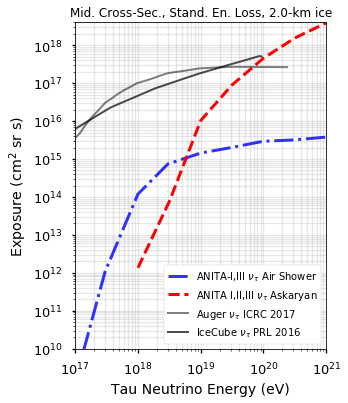

In [13]:
pyp.figure(figsize=(4.5,6))
pyp.loglog(en1, exp1+exp3, color='blue', linestyle='-.',linewidth=3, alpha=0.8, label=r"ANITA-I,III $\nu_\tau$ Air Shower")
plot_anita_askaryan_exposure(color='red', linestyle='--', linewidth=3)
plot_auger_exposure_icrc2017(color='black', linestyle='-', linewidth=2, alpha=0.5)
plot_icecube_acceptance(color='black', linestyle='-', livetime=ICECUBE_LT,alpha=0.7, linewidth=2)

leg = pyp.legend(loc='lower right', fontsize=10,frameon=True, framealpha=1)
pyp.title("Mid. Cross-Sec., Stand. En. Loss, %2.1f-km ice"%ice_thick, fontsize=12)
pyp.grid(True, which='both', alpha=0.3)
pyp.xlabel(r"Tau Neutrino Energy (eV)", fontsize=14)
#if( (i_f_Lo)%5==0):
pyp.ylabel("Exposure (cm$^2$ sr s)")
#if( i_f_Lo == 0):
#leg = pyp.legend(loc='upper left')
pyp.setp(leg.get_title(),fontsize='xx-small')
pyp.subplots_adjust(hspace=0.5, wspace=0.5)
#pyp.ylim(1e4, 1e12)
#pyp.xlim(1e17,1e21)
pyp.xlim(1e17, 1e21)
pyp.ylim(1e10, 4e18)
pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita_combined_exposure_%dkm_altitude_%1.1fkm_ice.pdf"%(altitude, ice_thick),
            bbox_inches='tight')

In [14]:
norm = matplotlib.colors.Normalize(0,4)

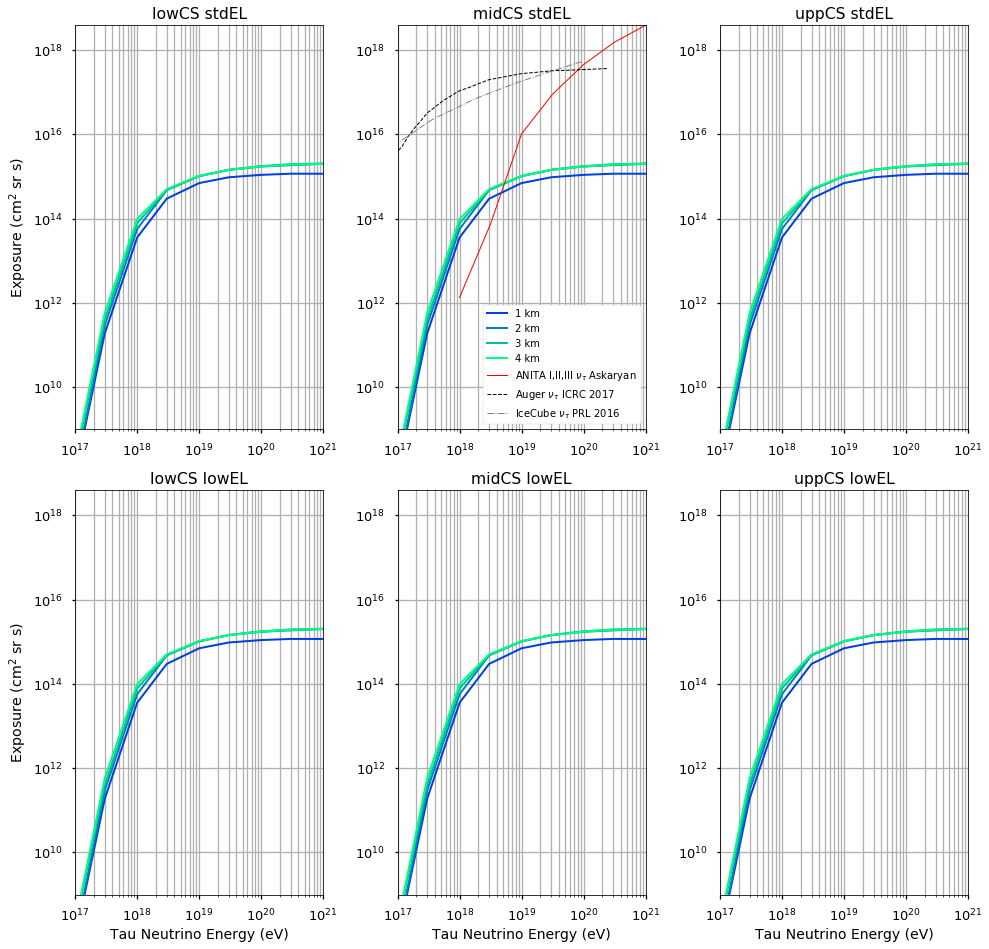

In [15]:
pyp.figure(figsize=(16, 16))

count = 1
for ie, eloss in enumerate(['std', 'low']):
    for ic, cross in enumerate(['low', 'mid', 'upp']):
        
        pyp.subplot(2,3,count)
        pyp.subplots_adjust(wspace=0.3, hspace=0.15)
    
        for ic in [1,2,3,4]:
            if ic == 0:
                label = r"%d km ice, ANITA-1 $\nu_\tau$"%(ic)
            else:
                label = r"%d km"%(ic)
            plot_acceptance_multiparm2d(altitude, ic, 180, 1020, 10, 1, 5, label=label, color=cmap(norm(ic)), linestyle='-',
                           dirc = "/anita/anita-1/", livetime=ANITA1_LT,cross=cross, eloss=eloss)
        
        if( cross == 'mid' and eloss == 'std'):
            plot_anita_askaryan_exposure(color='red')
            plot_auger_acceptance(color='black', linestyle='--', livetime=AUGER_LT)
            plot_icecube_acceptance(color='grey', linestyle='-.', livetime=ICECUBE_LT)
            
        pyp.title("%sCS %sEL"%(cross, eloss))
        pyp.grid(True, which='both')
        pyp.ylim(1e9, 4e18)
        pyp.xlim(1e17,1e21)
        if(eloss == 'low'):
            pyp.xlabel(r"Tau Neutrino Energy (eV)", fontsize=14)
        if(cross == 'low'):
            pyp.ylabel("Exposure (cm$^2$ sr s)")
        count = count + 1

pyp.subplot(2,3,2)
leg = pyp.legend(loc='lower right', fontsize=10,frameon=True, framealpha=1)
pyp.setp(leg.get_title(),fontsize='xx-small')
pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita_exposures_%dkm_altitude.pdf"%(altitude),
            bbox_inches='tight')

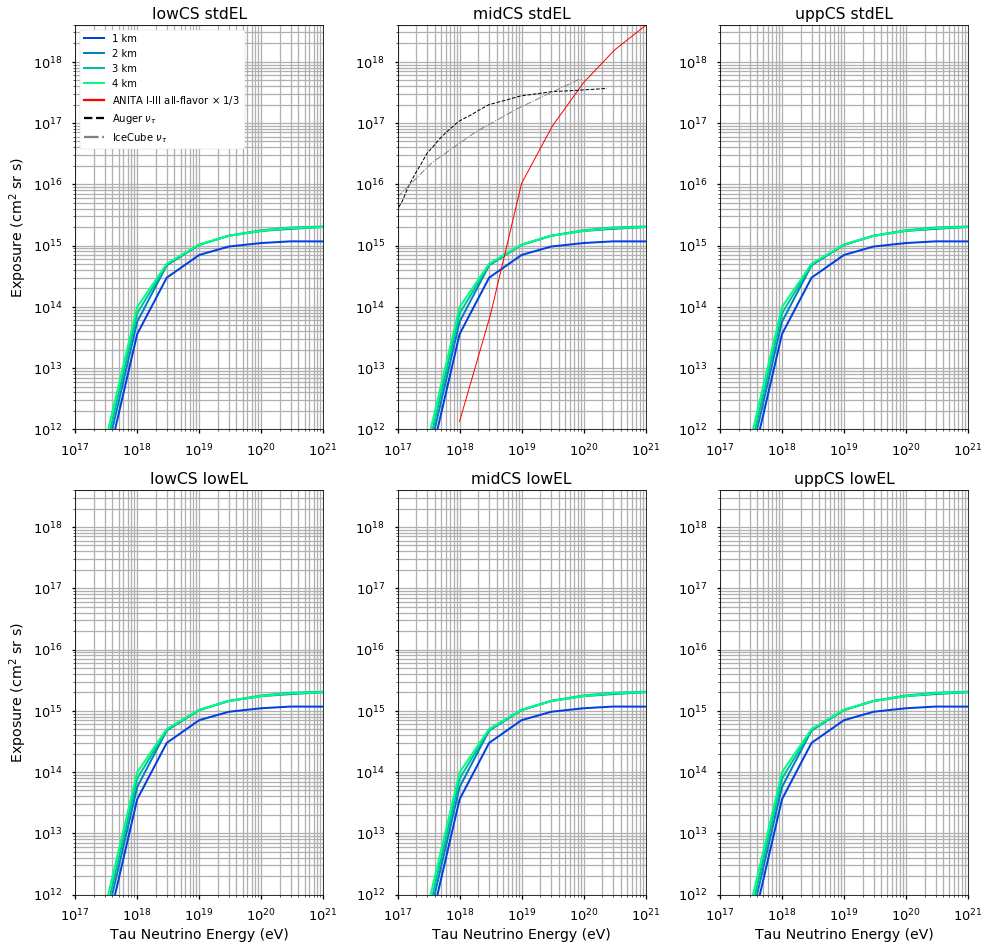

In [16]:
pyp.figure(figsize=(16, 16))

count = 1
for ie, eloss in enumerate(['std', 'low']):
    for ic, cross in enumerate(['low', 'mid', 'upp']):
        
        pyp.subplot(2,3,count)
        pyp.subplots_adjust(wspace=0.3, hspace=0.15)
    
        for ic in [1,2,3,4]:
            if ic == 0:
                label = r"%d km ice, ANITA I $\nu_\tau$"%(ic)
            else:
                label = r"%d km"%(ic)
            plot_acceptance_multiparm2d(altitude, ic, 180, 1020, 10, 1, 5, label=label, color=cmap(norm(ic)), linestyle='-',
                           dirc = "/anita/anita-1/", livetime=ANITA1_LT,cross=cross, eloss=eloss)
        
        if( cross == 'mid' and eloss == 'std'):
            plot_anita_askaryan_exposure(color='red',)
            plot_auger_acceptance(color='black', linestyle='--', livetime=AUGER_LT, )
            plot_icecube_acceptance(color='grey', linestyle='-.', livetime=ICECUBE_LT)
        if( cross == 'low' and eloss == 'std'):
            pyp.loglog([],[],color='red', label=r'ANITA I-III all-flavor $\times$ 1/3 ')
            pyp.loglog([],[],color='black',linestyle='--', label=r'Auger $\nu_\tau$')
            pyp.loglog([],[],color='grey', linestyle='-.', label=r'IceCube $\nu_\tau$')
            
        pyp.title("%sCS %sEL"%(cross, eloss))
        pyp.grid(True, which='both')
        pyp.ylim(1e12, 4e18)
        pyp.xlim(1e17,1e21)
        if(eloss == 'low'):
            pyp.xlabel(r"Tau Neutrino Energy (eV)", fontsize=14)
        if(cross == 'low'):
            pyp.ylabel("Exposure (cm$^2$ sr s)")
        count = count + 1

pyp.subplot(2,3,1)
leg = pyp.legend(loc='upper left', fontsize=10,frameon=True, framealpha=1)
pyp.setp(leg.get_title(),fontsize='xx-small')
pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita_exposures_%dkm_altitude_zoom.pdf"%(altitude),
            bbox_inches='tight')

In [17]:
def acceptance(dirc, altitude,ice_thick,cross, eloss,f_Lo,f_High,gain,nphased,a3phimasking=False):
    
    en1_list = [1,3]
    en2_list = np.arange(15, 22, 1)

    energy_array = []
    for i_en2, en2 in enumerate(en2_list):       
        for i_en1, en1 in enumerate(en1_list):  
            if( ~(en1==3 and en2==21)):
                #energy_array.append(np.log10(en1*pow(10.,en2)))
                energy_array.append(en1*pow(10.,en2))
    
    A_Omega_start_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_exit_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_range_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_trig_array = np.zeros([len(en1_list)*len(en2_list)-1])
    
    anita3_phimask_logen  = np.array([18, 18.5, 19, 19.5, 20, 20.5, 21])
    anita3_phimask_eff =    np.array([0.313058, 0.263607, 0.406598, 0.496359, 0.562547, 0.624839, 0.66609])
    
    i_en = 0
    for i_en2, en2 in enumerate(en2_list):       

        for i_en1, en1 in enumerate(en1_list):         
            if( f_High > 1660 or (en1==3 and en2==21) ):
                continue
            else:
                finame = os.environ['TAU_ACC_DET_DIR'] + dirc +"/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                    altitude,ice_thick,cross, eloss,en1,en2,f_Lo,f_High,gain,nphased)

                A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                A_Omega_start_array[ i_en] = A_Omega_start
                A_Omega_exit_array[i_en] = A_Omega_exit
                A_Omega_range_array[ i_en] = A_Omega_range
                A_Omega_trig_array[ i_en] = A_Omega_trig
                
                if( a3phimasking):
                    # NOTE FOR Energies < 10^18 using the 10^18 phimask efficiency
                    # FOR Energies >10^21 use the highest value
                    ind = find_nearest(anita3_phimask_logen, np.log10(en1*pow(10., en2)))
                    phimask_eff = anita3_phimask_eff[ind]
                else:
                    phimask_eff = 1.0
                    
                A_Omega_trig_array[ i_en] = A_Omega_trig * phimask_eff  
            i_en += 1

    return energy_array, A_Omega_trig_array

In [18]:
def exposure_plots(altitude, f_Lo, BW, 
                                gain, nphased, 
                                label="", color=None, livetime=1.,
                               dirc = "/anita/anita-1/", a3phimasking=False):
    
    linestyles=['-','--','-.',':']
    # first figure is a cross-section comparison
    #pyp.figure(1)
    pyp.subplot(1,3,1)
    ice_thick = 4.0
    eloss = 'std'
    for i,cross in enumerate(['low', 'mid', 'upp']):
        if(dirc == 'combined'):
            energy_array, A_Omega_trig_array1 = acceptance("/anita/anita-1/", 
                                                           altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
            energy_array3, A_Omega_trig_array3 = acceptance("/anita/anita-3/",
                                                            altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased,
                                                           a3phimasking=True)
            exposure = A_Omega_trig_array3*ANITA3_LT + A_Omega_trig_array1*ANITA1_LT
        else:
            energy_array, A_Omega_trig_array = acceptance(dirc, altitude,
                                                          ice_thick,cross, eloss,
                                                          f_Lo,f_Lo+BW,gain,nphased, 
                                                          a3phimasking)
            exposure = A_Omega_trig_array * livetime
        if( cross == 'low'):
            label=r'%s $\sigma$'%(cross)
        else:
            label=r'%s. $\sigma$'%(cross)
        color = 'k'
        alpha=1.0
        if( cross == 'low'):
            alpha=0.4
        elif( cross == 'mid'):
            alpha=0.7
        pyp.loglog( energy_array, exposure*1e10, label=label,color=color,
                    linestyle=linestyles[i], alpha=alpha, linewidth=3)
    
    # next figure is an energy loss comparison
    #pyp.figure(2)
    pyp.subplot(1,3,2)
    ice_thick = 4.0
    cross = 'mid'
    for i,eloss in enumerate(['low', 'std']):
        if(dirc == 'combined'):
            energy_array, A_Omega_trig_array1 = acceptance("/anita/anita-1/", 
                                                           altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
            energy_array3, A_Omega_trig_array3 = acceptance("/anita/anita-3/",
                                                            altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased,
                                                            a3phimasking=True)
            exposure = A_Omega_trig_array3*ANITA3_LT + A_Omega_trig_array1*ANITA1_LT
        else:
            energy_array, A_Omega_trig_array = acceptance(dirc, altitude,ice_thick,cross,
                                                          eloss,f_Lo,f_Lo+BW,gain,
                                                          nphased,a3phimasking)
            exposure = A_Omega_trig_array * livetime
        if eloss == 'low':
            label = "ASW"
        else:
            label = "ALLM"
        #label='%s energy loss'%(eloss)
        color = 'r'
        alpha=1.0
        if( eloss == 'low'):
            alpha=0.5
        pyp.loglog( energy_array, exposure*1e10, label=label,color=color,
                    linestyle=linestyles[i], alpha=alpha ,linewidth=3)
    
    # next figure is an ice-thickness comparison
    #pyp.figure(3)
    pyp.subplot(1,3,3)
    cross='mid'
    eloss='std'
    
    # first do a fill between
    norm = matplotlib.colors.Normalize(0,3)
    ice_thick = 0.0
    '''if(dirc == 'combined'):
        energy_array, A_Omega_trig_array1 = acceptance("/anita/decay_zenith_parm_6356p7523/", altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
        energy_array3, A_Omega_trig_array3 = acceptance("/anita/anita-3/",altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
        exposure0 = A_Omega_trig_array3*ANITA3_LT + A_Omega_trig_array1*ANITA1_LT
    else:
        energy_array, A_Omega_trig_array = acceptance(dirc, altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
        exposure0 = A_Omega_trig_array * livetime
    ice_thick = 4.0
    if(dirc == 'combined'):
        energy_array, A_Omega_trig_array1 = acceptance("/anita/decay_zenith_parm_6356p7523/", altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
        energy_array3, A_Omega_trig_array3 = acceptance("/anita/anita-3/",altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
        exposure4 = A_Omega_trig_array3*ANITA3_LT + A_Omega_trig_array1*ANITA1_LT
    else:
        energy_array, A_Omega_trig_array = acceptance(dirc, altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
        exposure4 = A_Omega_trig_array * livetime
    pyp.fill_between(energy_array, exposure0*1e10, exposure4*1e10, alpha=0.1, color=cmap(norm(0.0)) )'''
    for i,ice_thick in enumerate([1.0,2.0,3.0,4.0]):
        if(dirc == 'combined'):
            energy_array, A_Omega_trig_array1 = acceptance("/anita/anita-1/", 
                                                           altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
            energy_array3, A_Omega_trig_array3 = acceptance("/anita/anita-3/",altitude,ice_thick,cross,
                                                            eloss,f_Lo,f_Lo+BW,gain,nphased,
                                                           a3phimasking=True)
            exposure = A_Omega_trig_array3*ANITA3_LT + A_Omega_trig_array1*ANITA1_LT
        else:
            energy_array, A_Omega_trig_array = acceptance(dirc, altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased,a3phimasking)
            exposure = A_Omega_trig_array * livetime
        label='%d km'%(ice_thick) 
        pyp.loglog( energy_array, exposure*1e10, label=label,
                   color=cmap(norm(4.0-ice_thick)),linestyle=linestyles[i], alpha=1.0, linewidth=3)

[u'  upp. $\\sigma$, ALLM, 1 km', u'  mid. $\\sigma$, ALLM, 2 km', u'  low $\\sigma$, ASW, 4 km', u'ANITA I,II,III $\\nu_{\\tau}$ Askaryan', u'Auger $\\nu_{\\tau}$ ICRC 2017', u'IceCube $\\nu_{\\tau}$ PRL 2016', u'ANITA-I,III $\\nu_\\tau$ Air Shower']


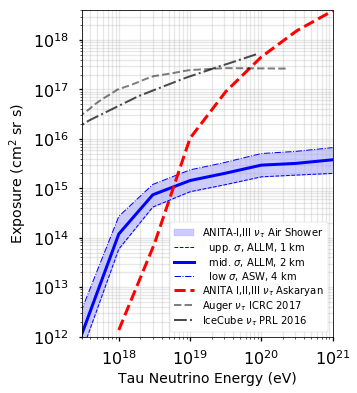

In [25]:
pyp.figure(figsize=(4.5,6))

# min curve
ice_thick = 1.0
eloss = "std"
cross = "upp"
f_Lo = 180
BW = 1020
gain = 10
nphased = 1
energy_array, A_Omega_trig_array1 = acceptance("/anita/anita-1/", 
                                               altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
energy_array3, A_Omega_trig_array3 = acceptance("/anita/anita-3/",
                                                altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased,
                                               a3phimasking=True)
min_exposure = A_Omega_trig_array3*ANITA3_LT + A_Omega_trig_array1*ANITA1_LT

# max curve
ice_thick = 4.0
eloss = "low"
cross = "low"
f_Lo = 180
BW = 1020
gain = 10
nphased = 1
energy_array, A_Omega_trig_array1 = acceptance("/anita/anita-1/", 
                                               altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
energy_array3, A_Omega_trig_array3 = acceptance("/anita/anita-3/",
                                                altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased,
                                               a3phimasking=True)
max_exposure = A_Omega_trig_array3*ANITA3_LT + A_Omega_trig_array1*ANITA1_LT

# std curve
ice_thick = 2.0
eloss = "std"
cross = "mid"
f_Lo = 180
BW = 1020
gain = 10
nphased = 1
energy_array, A_Omega_trig_array1 = acceptance("/anita/anita-1/", 
                                               altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased)
energy_array3, A_Omega_trig_array3 = acceptance("/anita/anita-3/",
                                                altitude,ice_thick,cross, eloss,f_Lo,f_Lo+BW,gain,nphased,
                                               a3phimasking=True)
std_exposure = A_Omega_trig_array3*ANITA3_LT + A_Omega_trig_array1*ANITA1_LT

ax = pyp.subplot()
ax.set_xscale("log")
ax.set_yscale("log")

pyp.fill_between(energy_array,min_exposure*1e10, 
                 max_exposure*1e10, color='blue', alpha=0.2, 
                 label=r"ANITA-I,III $\nu_\tau$ Air Shower")
pyp.loglog(energy_array, min_exposure*1e10, 
           color='blue', linestyle='--',linewidth=1, label=r"  upp. $\sigma$, ALLM, 1 km")
pyp.loglog(energy_array, std_exposure*1e10, 
           color='blue', linestyle='-',linewidth=3, label=r"  mid. $\sigma$, ALLM, 2 km")
pyp.loglog(energy_array, max_exposure*1e10, 
           color='blue', linestyle='-.',linewidth=1, label=r"  low $\sigma$, ASW, 4 km")

plot_anita_askaryan_exposure(color='red', linestyle='--', linewidth=3)
plot_auger_exposure_icrc2017(color='black', linestyle='--', linewidth=2, alpha=0.5)
plot_icecube_acceptance(color='black', linestyle='-.', livetime=ICECUBE_LT,alpha=0.7, linewidth=2)

handles,labels = ax.get_legend_handles_labels()
print labels
handles = [handles[6], handles[0], handles[1], handles[2], handles[3], handles[4], handles[5]]
labels =  [labels[6],  labels[0],   labels[1],  labels[2],  labels[3],  labels[4], labels[5]]
           
leg = pyp.legend(handles, labels, loc='lower right', fontsize=10,frameon=True, framealpha=1, labelspacing=0.1)
#pyp.title("Mid. Cross-Sec., Stand. En. Loss")
pyp.grid(True, which='both', alpha=0.3)
pyp.xlabel(r"Tau Neutrino Energy (eV)", fontsize=14)
#if( (i_f_Lo)%5==0):
pyp.ylabel("Exposure (cm$^2$ sr s)")
#if( i_f_Lo == 0):
#leg = pyp.legend(loc='upper left')
pyp.setp(leg.get_title(),fontsize='xx-small')
pyp.subplots_adjust(hspace=0.5, wspace=0.5)
#pyp.ylim(1e4, 1e12)
#pyp.xlim(1e17,1e21)
pyp.xlim(3e17, 1e21)
pyp.ylim(1e12, 4e18)
pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita_combined_exposure_var_%dkm_altitude.pdf"%(altitude),
            bbox_inches='tight')

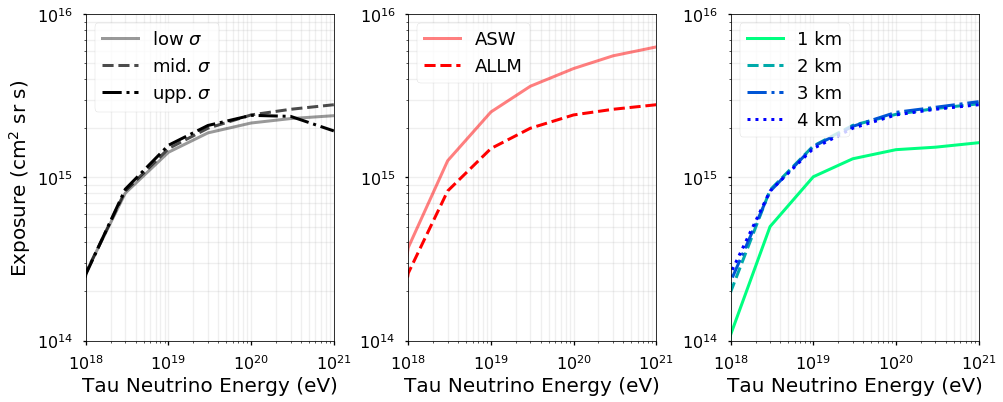

In [26]:
pyp.rcParams['font.size']=28
pyp.figure(figsize=(16,6))
pyp.rcParams['xtick.labelsize']=16
pyp.rcParams['ytick.labelsize']=16
exposure_plots(37, 180, 1020, 
                10, 1, 
                label="", color=None, livetime=ANITA3_LT,
                #dirc = 'combined')
                dirc = "/anita/anita-3/")#,a3phimasking=True)
xmin = 1e18 #1e17,1e18
xmax = 1e21
ymin = 1e14 #1e14
ymax = 1e16
pyp.subplot(1,3,1)
pyp.legend(fontsize=18, loc='upper left')
pyp.ylim(ymin,ymax)
pyp.xlim(xmin,xmax)
pyp.grid(True, which='both', alpha=0.2)
pyp.ylabel("Exposure (cm$^2$ sr s)", fontsize=20)
pyp.xlabel("Tau Neutrino Energy (eV)",fontsize=20)
pyp.subplot(1,3,2)
pyp.legend(fontsize=18, loc='upper left')
pyp.ylim(ymin,ymax)
pyp.xlim(xmin,xmax)
pyp.grid(True, which='both', alpha=0.2)
pyp.xlabel("Tau Neutrino Energy (eV)",fontsize=20)
pyp.subplot(1,3,3)
pyp.legend(fontsize=18, loc='upper left')
pyp.ylim(ymin,ymax)
pyp.xlim(xmin,xmax)
pyp.grid(True, which='both', alpha=0.2)
pyp.xlabel("Tau Neutrino Energy (eV)",fontsize=20)
pyp.subplots_adjust(wspace=0.3)
#pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita_combined_exposure_variations.pdf", bbox_inches='tight')
pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita3_exposure_variations_zoom_nophimasking.pdf", bbox_inches='tight')

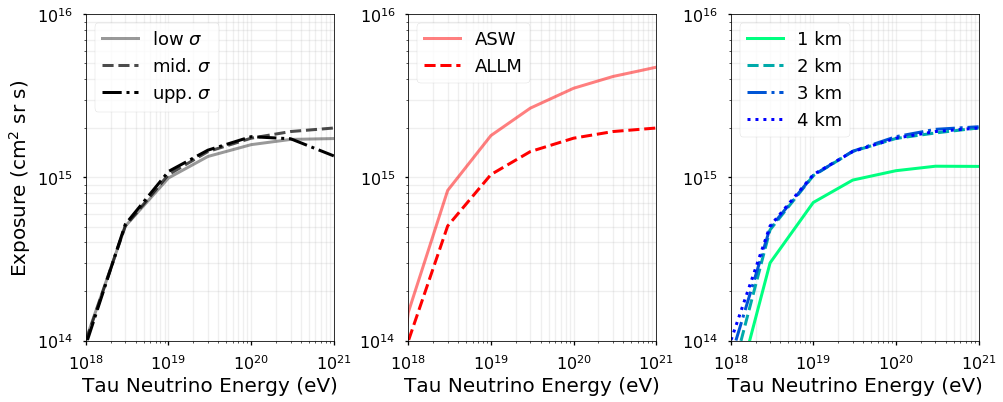

In [27]:
pyp.rcParams['font.size']=28
pyp.figure(figsize=(16,6))
pyp.rcParams['xtick.labelsize']=16
pyp.rcParams['ytick.labelsize']=16
exposure_plots(37, 180, 1020, 
                10, 1, 
                label="", color=None, livetime=ANITA1_LT,
                dirc = '/anita/anita-1', )
               # dirc = "/anita/anita-3/",a3phimasking=True)
xmin = 1e18 #1e17,1e18
xmax = 1e21
ymin = 1e14 #1e14
ymax = 1e16
pyp.subplot(1,3,1)
pyp.legend(fontsize=18, loc='upper left')
pyp.ylim(ymin,ymax)
pyp.xlim(xmin,xmax)
pyp.grid(True, which='both', alpha=0.2)
pyp.ylabel("Exposure (cm$^2$ sr s)", fontsize=20)
pyp.xlabel("Tau Neutrino Energy (eV)",fontsize=20)
pyp.subplot(1,3,2)
pyp.legend(fontsize=18, loc='upper left')
pyp.ylim(ymin,ymax)
pyp.xlim(xmin,xmax)
pyp.grid(True, which='both', alpha=0.2)
pyp.xlabel("Tau Neutrino Energy (eV)",fontsize=20)
pyp.subplot(1,3,3)
pyp.legend(fontsize=18, loc='upper left')
pyp.ylim(ymin,ymax)
pyp.xlim(xmin,xmax)
pyp.grid(True, which='both', alpha=0.2)
pyp.xlabel("Tau Neutrino Energy (eV)",fontsize=20)
pyp.subplots_adjust(wspace=0.3)
#pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita_combined_exposure_variations.pdf", bbox_inches='tight')
pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita1_exposure_variations_zoom.pdf", bbox_inches='tight')

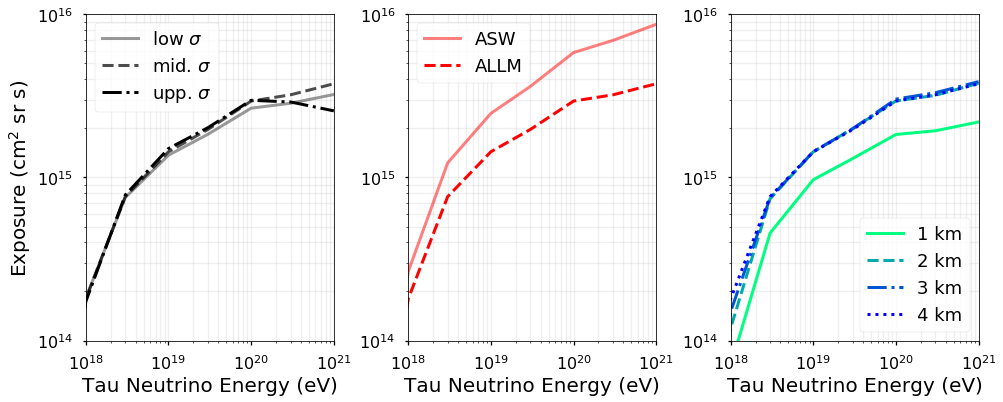

In [28]:
pyp.rcParams['font.size']=28
pyp.figure(figsize=(16,6))
pyp.rcParams['xtick.labelsize']=16
pyp.rcParams['ytick.labelsize']=16
exposure_plots(37, 180, 1020, 
                10, 1, 
                label="", color=None, livetime=ANITA3_LT,
                dirc = 'combined')#dirc = "/anita/anita-3/")
                
xmin = 1e18 #1e17,1e18
xmax = 1e21
ymin = 1e14 #1e14
ymax = 1e16
pyp.subplot(1,3,1)
pyp.legend(fontsize=18, )
pyp.ylim(ymin,ymax)
pyp.xlim(xmin,xmax)
pyp.grid(True, which='both', alpha=0.2)
pyp.ylabel("Exposure (cm$^2$ sr s)", fontsize=20)
pyp.xlabel("Tau Neutrino Energy (eV)",fontsize=20)
pyp.subplot(1,3,2)
pyp.legend(fontsize=18, )
pyp.ylim(ymin,ymax)
pyp.xlim(xmin,xmax)
pyp.grid(True, which='both', alpha=0.2)
pyp.xlabel("Tau Neutrino Energy (eV)",fontsize=20)
pyp.subplot(1,3,3)
pyp.legend(fontsize=18, loc='lower right')
pyp.ylim(ymin,ymax)
pyp.xlim(xmin,xmax)
pyp.grid(True, which='both', alpha=0.2)
pyp.xlabel("Tau Neutrino Energy (eV)",fontsize=20)
pyp.subplots_adjust(wspace=0.3)
#pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita_combined_exposure_variations.pdf", bbox_inches='tight')
pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita_combined_exposure_variations_zoom.pdf", bbox_inches='tight')

In [23]:
def combined_exposure_plots(altitude, f_Lo, BW, 
                                gain, nphased, 
                                label="", color=None, linestyle=None):

    en1_list = [1,3]
    en2_list = np.arange(15, 22, 1)

    A_Omega_start_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_exit_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_range_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_trig_array = np.zeros([len(en1_list)*len(en2_list)-1])

    energy_array = []
    for i_en2, en2 in enumerate(en2_list):       
        for i_en1, en1 in enumerate(en1_list):  
            if( ~(en1==3 and en2==21)):
                #energy_array.append(np.log10(en1*pow(10.,en2)))
                energy_array.append(en1*pow(10.,en2))
    #print energy_array
    
    # first figure is a cross-section comparison
    #pyp.figure(1)
    pyp.subplot(1,3,1)
    ice_thick = 4.0
    eloss = 'std'
    for cross in ['low', 'mid', 'upp']:
        i_en = 0
        for i_en2, en2 in enumerate(en2_list):       

            for i_en1, en1 in enumerate(en1_list):         
                f_High = f_Lo + BW
                if( f_High > 1660 or (en1==3 and en2==21) ):
                    continue
                else:
                    #finame = os.environ['TAU_ACC_DET_DIR']+"/detector_acceptance_altitude_%d_km_2.0km_ice_lowCS_stdEL_%de+%d_eV_%d-%dMHz.npz"%(
                    #  altitude, en1, en2, f_Lo, f_High)
                    dirc = "/anita/anita-1/"
                    finame = os.environ['TAU_ACC_DET_DIR'] + dirc +"/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                        altitude,ice_thick,cross, eloss,en1,en2,f_Lo,f_High,gain,nphased)
                    #print finame
                    #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                    A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                    A_Omega_start_array[ i_en] = A_Omega_start*ANITA1_LT
                    A_Omega_exit_array[i_en] = A_Omega_exit*ANITA1_LT
                    A_Omega_range_array[ i_en] = A_Omega_range*ANITA1_LT
                    A_Omega_trig_array[ i_en] = A_Omega_trig*ANITA1_LT
                    
                    
                    dirc = "/anita/anita-3/"
                    finame = os.environ['TAU_ACC_DET_DIR'] + dirc +"/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                        altitude,ice_thick,cross, eloss,en1,en2,f_Lo,f_High,gain,nphased)
                    #print finame
                    #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                    A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                    A_Omega_start_array[ i_en] = A_Omega_start_array[i_en] + A_Omega_start *ANITA3_LT
                    A_Omega_exit_array[i_en] = A_Omega_exit_array[i_en] + A_Omega_exit*ANITA3_LT
                    A_Omega_range_array[ i_en] = A_Omega_range_array[i_en] + A_Omega_range*ANITA3_LT
                    A_Omega_trig_array[ i_en] = A_Omega_trig_array[i_en] + A_Omega_trig*ANITA3_LT
                    
                    #pyp.semilogy(np.log10(en1*pow(10.,en2)), A_Omega_trig, '.')
                    #print np.log10(en1*pow(10,en2))
                    #if( en1 == 1 and en2 == 21):
                    #    print finame, A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy, en1, en2, energy_array[i_en]
                i_en += 1
        label='%s cross-section'%(cross)
        color = cmap(norm(4.0-ice_thick))
        if( cross == 'low'):
            color='k'
        elif( cross == 'upp'):
            color='r'
        pyp.loglog( energy_array, A_Omega_trig_array*1e10, label=label,color=color,linestyle=linestyle, alpha=0.8)
    
    # next figure is an energy loss comparison
    #pyp.figure(2)
    pyp.subplot(1,3,2)
    ice_thick = 4.0
    cross = 'mid'
    for eloss in ['low', 'std']:
        i_en = 0
        for i_en2, en2 in enumerate(en2_list):       

            for i_en1, en1 in enumerate(en1_list):         
                f_High = f_Lo + BW
                if( f_High > 1660 or (en1==3 and en2==21) ):
                    continue
                else:
                    #finame = os.environ['TAU_ACC_DET_DIR']+"/detector_acceptance_altitude_%d_km_2.0km_ice_lowCS_stdEL_%de+%d_eV_%d-%dMHz.npz"%(
                    #  altitude, en1, en2, f_Lo, f_High)

                    dirc = "/anita/anita-1/"
                    finame = os.environ['TAU_ACC_DET_DIR'] + dirc +"/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                        altitude,ice_thick,cross, eloss,en1,en2,f_Lo,f_High,gain,nphased)
                    #print finame
                    #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                    A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                    A_Omega_start_array[ i_en] = A_Omega_start*ANITA1_LT
                    A_Omega_exit_array[i_en] = A_Omega_exit*ANITA1_LT
                    A_Omega_range_array[ i_en] = A_Omega_range*ANITA1_LT
                    A_Omega_trig_array[ i_en] = A_Omega_trig*ANITA1_LT
                    
                    
                    dirc = "/anita/anita-3/"
                    finame = os.environ['TAU_ACC_DET_DIR'] + dirc +"/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                        altitude,ice_thick,cross, eloss,en1,en2,f_Lo,f_High,gain,nphased)
                    #print finame
                    #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                    A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                    A_Omega_start_array[ i_en] = A_Omega_start_array[i_en] + A_Omega_start *ANITA3_LT
                    A_Omega_exit_array[i_en] = A_Omega_exit_array[i_en] + A_Omega_exit*ANITA3_LT
                    A_Omega_range_array[ i_en] = A_Omega_range_array[i_en] + A_Omega_range*ANITA3_LT
                    A_Omega_trig_array[ i_en] = A_Omega_trig_array[i_en] + A_Omega_trig*ANITA3_LT
                    
                    #pyp.semilogy(np.log10(en1*pow(10.,en2)), A_Omega_trig, '.')
                    #print np.log10(en1*pow(10,en2))
                    #if( en1 == 1 and en2 == 21):
                    #    print finame, A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy, en1, en2, energy_array[i_en]
                i_en += 1
        label='%s energy loss'%(eloss)
        color = cmap(norm(4.0-ice_thick))
        if( eloss == 'low'):
            color='k'
        pyp.loglog( energy_array, A_Omega_trig_array*1e10, label=label,color=color,linestyle=linestyle, alpha=0.8)
    
    # next figure is an ice-thickness comparison
    #pyp.figure(3)
    pyp.subplot(1,3,3)
    cross='mid'
    eloss='std'
    for ice_thick in [1.0,2.0,3.0,4.0]:
        i_en = 0
        for i_en2, en2 in enumerate(en2_list):       

            for i_en1, en1 in enumerate(en1_list):         
                f_High = f_Lo + BW
                if( f_High > 1660 or (en1==3 and en2==21) ):
                    continue
                else:
                    #finame = os.environ['TAU_ACC_DET_DIR']+"/detector_acceptance_altitude_%d_km_2.0km_ice_lowCS_stdEL_%de+%d_eV_%d-%dMHz.npz"%(
                    #  altitude, en1, en2, f_Lo, f_High)

                    dirc = "/anita/anita-1/"
                    finame = os.environ['TAU_ACC_DET_DIR'] + dirc +"/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                        altitude,ice_thick,cross, eloss,en1,en2,f_Lo,f_High,gain,nphased)
                    #print finame
                    #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                    A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                    A_Omega_start_array[ i_en] = A_Omega_start*ANITA1_LT
                    A_Omega_exit_array[i_en] = A_Omega_exit*ANITA1_LT
                    A_Omega_range_array[ i_en] = A_Omega_range*ANITA1_LT
                    A_Omega_trig_array[ i_en] = A_Omega_trig*ANITA1_LT
                    
                    
                    dirc = "/anita/anita-3/"
                    finame = os.environ['TAU_ACC_DET_DIR'] + dirc +"/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                        altitude,ice_thick,cross, eloss,en1,en2,f_Lo,f_High,gain,nphased)
                    #print finame
                    #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                    A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                    A_Omega_start_array[ i_en] = A_Omega_start_array[i_en] + A_Omega_start *ANITA3_LT
                    A_Omega_exit_array[i_en] = A_Omega_exit_array[i_en] + A_Omega_exit*ANITA3_LT
                    A_Omega_range_array[ i_en] = A_Omega_range_array[i_en] + A_Omega_range*ANITA3_LT
                    A_Omega_trig_array[ i_en] = A_Omega_trig_array[i_en] + A_Omega_trig*ANITA3_LT
                    
                    #pyp.semilogy(np.log10(en1*pow(10.,en2)), A_Omega_trig, '.')
                    #print np.log10(en1*pow(10,en2))
                    #if( en1 == 1 and en2 == 21):
                    #    print finame, A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy, en1, en2, energy_array[i_en]
                i_en += 1
        
        label='%d km ice'%(ice_thick) 
        pyp.loglog( energy_array, A_Omega_trig_array*1e10, label=label,color=cmap(norm(4.0-ice_thick)),linestyle=linestyle, alpha=0.8)

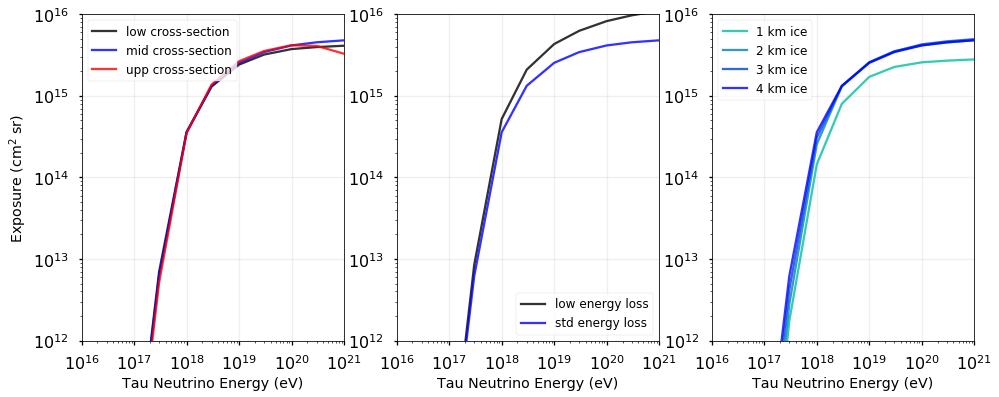

In [24]:
pyp.figure(figsize=(16,6))
combined_exposure_plots(37, 180, 1020, 
                                10, 1, 
                                label="", color=None, linestyle=None)
                               
pyp.subplot(1,3,1)
pyp.legend(fontsize=12, loc='upper left')
pyp.ylim(1e12,1e16)
pyp.xlim(1e16,1e21)
pyp.grid(True, alpha=0.2)
pyp.ylabel("Exposure (cm$^2$ sr)")
pyp.xlabel("Tau Neutrino Energy (eV)")
pyp.subplot(1,3,2)
pyp.legend(fontsize=12)
pyp.ylim(1e12,1e16)
pyp.xlim(1e16,1e21)
pyp.grid(True, alpha=0.2)
pyp.xlabel("Tau Neutrino Energy (eV)")
pyp.subplot(1,3,3)
pyp.legend(fontsize=12)
pyp.ylim(1e12,1e16)
pyp.xlim(1e16,1e21)
pyp.grid(True, alpha=0.2)
pyp.xlabel("Tau Neutrino Energy (eV)")
pyp.subplots_adjust(hspace=1.0)